In [1]:
import networkx 
import matplotlib.pyplot as plt

#from networkx.algorithms.flow import ford_fulkerson
from networkx.algorithms.flow import edmonds_karp

In [3]:
def geraGrafo(len_grid, coord_part):

    grafoT = networkx.DiGraph()

    nx = len_grid # Largura do grid
    ny = len_grid # Altura do grid

    # Ordenando as coordenadas de partidas
    coord_part = sorted(coord_part)
    
    #adicionand os vértices S e T
    grafoT.add_node('S')
    grafoT.add_node('T')

    #criando os vértices do grid já duplicados e com as arestas Vin-Vout
    for i in range(1, nx + 1):
        for j in range(1, ny + 1):
            grafoT.add_node(str(i) + '-' + str(j) + '-IN')
            grafoT.add_node(str(i) + '-' + str(j) + '-OUT')
            grafoT.add_edge(str(i) + '-' + str(j) + '-IN', str(i) + '-' + str(j) + '-OUT', capacity=1.0)

            
    
    #arestas de origem S para pontos de fuga
    for cord in coord_part:
        grafoT.add_edge('S', str(cord[0])+'-'+str(cord[1])+'-IN', capacity=1.0)
        

    #Demais arestas do grid
    for i in range(1, nx + 1):
        for j in range(1, ny + 1):
            if( i > 1 and i <= nx and j > 1 and j <= ny):
                grafoT.add_edge(str(i - 1) + '-' + str(j) + '-OUT', str(i) + '-' + str(j) + '-IN', capacity=1.0)
                grafoT.add_edge(str(i) + '-' + str(j) + '-OUT', str(i - 1) + '-' + str(j) + '-IN', capacity=1.0)
                grafoT.add_edge(str(i) + '-' + str(j - 1) + '-OUT', str(i) + '-' + str(j) + '-IN', capacity=1.0)
                grafoT.add_edge(str(i) + '-' + str(j) + '-OUT', str(i) + '-' + str(j - 1) + '-IN', capacity=1.0)

    for i in range(1, nx):
        grafoT.add_edge(str(1) + '-' + str(i) + '-OUT', str(1) + '-' + str(i + 1) + '-IN', capacity=1.0)
        grafoT.add_edge(str(1) + '-' + str(i + 1) + '-OUT', str(1) + '-' + str(i) + '-IN', capacity=1.0)
        grafoT.add_edge(str(i) + '-' + str(1) + '-OUT', str(i + 1) + '-' + str(1) + '-IN', capacity=1.0)
        grafoT.add_edge(str(i + 1) + '-' + str(1) + '-OUT', str(i) + '-' + str(1) + '-IN', capacity=1.0)


    #arestas das bordas para T
    for i in range(1, nx + 1):
        grafoT.add_edge(str(1) + '-' + str(i) + '-OUT', 'T', capacity=1.0)
        grafoT.add_edge(str(i) + '-' + str(1) + '-OUT', 'T', capacity=1.0)
        grafoT.add_edge(str(nx) + '-' + str(i) + '-OUT', 'T', capacity=1.0)
        grafoT.add_edge(str(i) + '-' + str(nx) + '-OUT', 'T', capacity=1.0)

    print("Nós:", grafoT.nodes)
    print("")
    print("Arestas: ", grafoT.edges)

    pos = networkx.spring_layout(grafoT)
    networkx.draw_networkx_nodes(grafoT, pos)
    networkx.draw_networkx_labels(grafoT, pos)
    networkx.draw_networkx_edges(grafoT, pos, edge_color='r', arrows = True)
    plt.show()
    
    return grafoT

In [21]:
def pathFlow(flow_dic, cord_part, len_grid):
    
    list_path_flow = []
    
    for coord in cord_part:
        path_flow = []
        path_flow.append(coord) # Ponto de partida
        # Verificar se a coordenada de escape ta na borda do gride
        if coord[0] == 1 or coord[1] == 1 or coord[0] == len_grid or coord[1] == len_grid:
            path_flow.append(coord)
        
        else:
            pont_part = str(coord[0])+'-'+str(coord[1])+'-OUT'
            aux = True
            out_flow = list(flow_dic[pont_part])
            while aux:
                for i in  out_flow:
                    if int(flow_dic[pont_part][i]) == 1:
                        c = [int(i[0]), int(i[2])]
                        path_flow.append(c)
                
                out_flow = list(flow_dic[str(c[0])+'-'+str(c[1])+'-OUT'])
                pont_part = str(c[0])+'-'+str(c[1])+'-OUT'
                if c[0] == 1 or c[1] == 1 or c[0] == len_grid or c[1] == len_grid:
                    aux = False
        list_path_flow.append(path_flow)
    return list_path_flow

Nós: ['S', 'T', '1-1-IN', '1-1-OUT', '1-2-IN', '1-2-OUT', '1-3-IN', '1-3-OUT', '1-4-IN', '1-4-OUT', '1-5-IN', '1-5-OUT', '1-6-IN', '1-6-OUT', '2-1-IN', '2-1-OUT', '2-2-IN', '2-2-OUT', '2-3-IN', '2-3-OUT', '2-4-IN', '2-4-OUT', '2-5-IN', '2-5-OUT', '2-6-IN', '2-6-OUT', '3-1-IN', '3-1-OUT', '3-2-IN', '3-2-OUT', '3-3-IN', '3-3-OUT', '3-4-IN', '3-4-OUT', '3-5-IN', '3-5-OUT', '3-6-IN', '3-6-OUT', '4-1-IN', '4-1-OUT', '4-2-IN', '4-2-OUT', '4-3-IN', '4-3-OUT', '4-4-IN', '4-4-OUT', '4-5-IN', '4-5-OUT', '4-6-IN', '4-6-OUT', '5-1-IN', '5-1-OUT', '5-2-IN', '5-2-OUT', '5-3-IN', '5-3-OUT', '5-4-IN', '5-4-OUT', '5-5-IN', '5-5-OUT', '5-6-IN', '5-6-OUT', '6-1-IN', '6-1-OUT', '6-2-IN', '6-2-OUT', '6-3-IN', '6-3-OUT', '6-4-IN', '6-4-OUT', '6-5-IN', '6-5-OUT', '6-6-IN', '6-6-OUT']

Arestas:  [('S', '2-2-IN'), ('S', '2-4-IN'), ('S', '2-6-IN'), ('S', '3-1-IN'), ('S', '3-2-IN'), ('S', '3-4-IN'), ('S', '3-6-IN'), ('S', '4-2-IN'), ('S', '4-4-IN'), ('S', '4-6-IN'), ('1-1-IN', '1-1-OUT'), ('1-1-OUT', '1-2-IN'), 

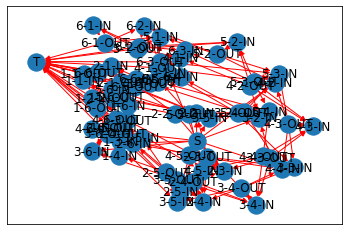

In [6]:
cord_part = [ [2, 2], [2, 4], [2, 6], [3, 1], [3, 2], [3, 4], [3, 6], [4, 2], [4, 4], [4, 6] ]
len_grid = 6
grafo_01 = geraGrafo(len_grid, cord_part)

In [7]:
R = edmonds_karp(grafo_01, "S", "T")
flow_value, flow_dict = networkx.maximum_flow(grafo_01, "S", "T")
print(flow_value)
print(flow_dict)

10.0
{'S': {'2-2-IN': 1.0, '2-4-IN': 1.0, '2-6-IN': 1.0, '3-1-IN': 1.0, '3-2-IN': 1.0, '3-4-IN': 1.0, '3-6-IN': 1.0, '4-2-IN': 1.0, '4-4-IN': 1.0, '4-6-IN': 1.0}, 'T': {}, '1-1-IN': {'1-1-OUT': 0}, '1-1-OUT': {'1-2-IN': 0, '2-1-IN': 0, 'T': 0}, '1-2-IN': {'1-2-OUT': 1.0}, '1-2-OUT': {'2-2-IN': 0, '1-1-IN': 0, '1-3-IN': 0, 'T': 1.0}, '1-3-IN': {'1-3-OUT': 1.0}, '1-3-OUT': {'2-3-IN': 0, '1-2-IN': 0, '1-4-IN': 0, 'T': 1.0}, '1-4-IN': {'1-4-OUT': 1.0}, '1-4-OUT': {'2-4-IN': 0, '1-3-IN': 0, '1-5-IN': 0, 'T': 1.0}, '1-5-IN': {'1-5-OUT': 1.0}, '1-5-OUT': {'2-5-IN': 0, '1-4-IN': 0, '1-6-IN': 0, 'T': 1.0}, '1-6-IN': {'1-6-OUT': 0}, '1-6-OUT': {'2-6-IN': 0, '1-5-IN': 0, 'T': 0}, '2-1-IN': {'2-1-OUT': 0}, '2-1-OUT': {'2-2-IN': 0, '1-1-IN': 0, '3-1-IN': 0, 'T': 0}, '2-2-IN': {'2-2-OUT': 1.0}, '2-2-OUT': {'1-2-IN': 1.0, '2-1-IN': 0, '2-3-IN': 0, '3-2-IN': 0}, '2-3-IN': {'2-3-OUT': 1.0}, '2-3-OUT': {'1-3-IN': 1.0, '2-2-IN': 0, '2-4-IN': 0, '3-3-IN': 0}, '2-4-IN': {'2-4-OUT': 1.0}, '2-4-OUT': {'1-4-I

In [17]:
flow_value

10.0

In [22]:
caminho = pathFlow(flow_dict, cord_part, len_grid)
caminho

[[[2, 2], [1, 2]],
 [[2, 4], [1, 4]],
 [[2, 6], [2, 6]],
 [[3, 1], [3, 1]],
 [[3, 2], [3, 3], [2, 3], [1, 3]],
 [[3, 4], [3, 5], [2, 5], [1, 5]],
 [[3, 6], [3, 6]],
 [[4, 2], [4, 1]],
 [[4, 4], [5, 4], [6, 4]],
 [[4, 6], [4, 6]]]